In [1]:
import numpy as np 
from ECFM_Validation_Helpers import sample_actual_profile, model_validation, model_validation_with_phase, phase_validation, magnitude_validation
from math import pi 
from numpy import genfromtxt

In [2]:
validation_directory = 'ECFM_Validation_Inputs'
sensitivity_file = validation_directory + '/ECFM_measured_sensitivity.csv'
phase_file = validation_directory + '/ECFM_measured_phase_radian.csv'
cfd_rad_pos_file = validation_directory + '/ECFM_rad_pos.csv'
cfd_vel_profile_file = validation_directory + '/ECFM_CFD_velocity.csv'
model_rad_pos_file = 'ECFM_Inputs/ECFM_rad.csv'
matrix_file = 'ECFM_Inputs/ECFM_matrix.csv'
frequency_file = 'ECFM_Inputs/ECFM_freq.csv'

phase_shift = 0

measured_mag = np.loadtxt(sensitivity_file,delimiter=',')
measured_phase = np.loadtxt(phase_file,delimiter=',').reshape(-1, 1) - pi + 0.4
measured_phase[4:10] += 2 * pi 
model_rad_pos = np.loadtxt(model_rad_pos_file,delimiter=',')
freq = np.loadtxt(frequency_file, delimiter=',') # Hz 

cfd_rad_pos = np.loadtxt(cfd_rad_pos_file, delimiter=',')
cfd_vel_profile = np.loadtxt(cfd_vel_profile_file, delimiter=',')


A = np.transpose(np.vectorize(lambda t:complex(t.replace('i','j'))) (genfromtxt(matrix_file, delimiter=',',dtype='str')))
A = np.delete(A, -1, axis=0)
A = np.delete(A, -1, axis=0)

sample_profile = sample_actual_profile(cfd_rad_pos, cfd_vel_profile, model_rad_pos)
simulate_b = np.matmul(A, sample_profile)
cfd_simulate_mag = np.abs(simulate_b)
cfd_simulate_phase = np.angle(simulate_b)

measured_phase += phase_shift
cfd_simulate_phase += phase_shift

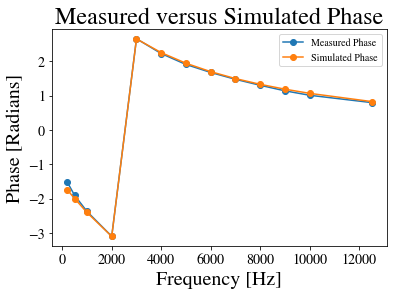

Frequency Index:  1 AE [Rad]: 2.2696E-01 NAE:  14.96%
Frequency Index:  2 AE [Rad]: 9.3124E-02 NAE:  4.88%
Frequency Index:  3 AE [Rad]: 3.0627E-02 NAE:  1.29%
Frequency Index:  4 AE [Rad]: 2.9336E-03 NAE:  0.09%
Frequency Index:  5 AE [Rad]: 4.7264E-03 NAE:  0.18%
Frequency Index:  6 AE [Rad]: 2.7118E-02 NAE:  1.22%
Frequency Index:  7 AE [Rad]: 3.5990E-02 NAE:  1.89%
Frequency Index:  8 AE [Rad]: 2.3054E-02 NAE:  1.38%
Frequency Index:  9 AE [Rad]: 2.1176E-02 NAE:  1.44%
Frequency Index: 10 AE [Rad]: 2.8032E-02 NAE:  2.16%
Frequency Index: 11 AE [Rad]: 4.7719E-02 NAE:  4.20%
Frequency Index: 12 AE [Rad]: 5.5937E-02 NAE:  5.55%
Frequency Index: 13 AE [Rad]: 3.0069E-02 NAE:  3.78%
Global Average AE [Rad]: 4.8267E-02 NAE:  3.31%


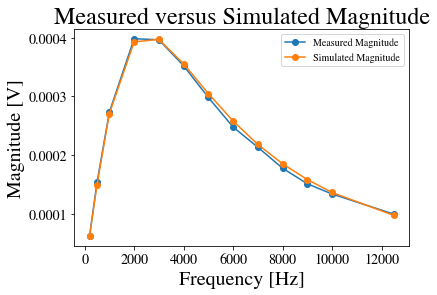

Frequency Index:  1 AE [V]: 9.6152E-07 NAE:  1.54%
Frequency Index:  2 AE [V]: 4.2607E-06 NAE:  2.78%
Frequency Index:  3 AE [V]: 2.4470E-06 NAE:  0.90%
Frequency Index:  4 AE [V]: 5.4850E-06 NAE:  1.38%
Frequency Index:  5 AE [V]: 6.9285E-07 NAE:  0.17%
Frequency Index:  6 AE [V]: 3.2858E-06 NAE:  0.93%
Frequency Index:  7 AE [V]: 6.6152E-06 NAE:  2.22%
Frequency Index:  8 AE [V]: 1.0178E-05 NAE:  4.10%
Frequency Index:  9 AE [V]: 4.8125E-06 NAE:  2.25%
Frequency Index: 10 AE [V]: 7.6259E-06 NAE:  4.29%
Frequency Index: 11 AE [V]: 7.1910E-06 NAE:  4.76%
Frequency Index: 12 AE [V]: 2.5771E-06 NAE:  1.93%
Frequency Index: 13 AE [V]: 2.1651E-06 NAE:  2.18%
Global Average AE [V]: 4.4845E-06 NAE:  2.26%


In [3]:
phase_validation(measured_phase[:-2], cfd_simulate_phase, freq[:-2])
magnitude_validation(measured_mag[:-2], cfd_simulate_mag, freq[:-2])

32/32 [==============================] - 0s 381us/step
Monte Carlo Uncertainty Quantification
component: 0 RMSE: 0.09 m/s NRMSE: 7%
component: 1 RMSE: 0.04 m/s NRMSE: 3%
component: 2 RMSE: 0.03 m/s NRMSE: 2%
component: 3 RMSE: 0.05 m/s NRMSE: 4%
component: 4 RMSE: 0.02 m/s NRMSE: 2%
component: 5 RMSE: 0.02 m/s NRMSE: 2%
component: 6 RMSE: 0.02 m/s NRMSE: 2%
Max Error Component: 0 RMSE: 0.09 m/s NRMSE: 7%


2022-08-04 12:55:58.356184: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


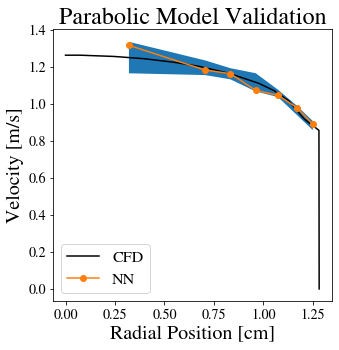

Actual Error in the Parabolic_With_Phase model
Component: 0 MAE: 0.07 m/s NMAE: 5%
Component: 1 MAE: 0.01 m/s NMAE: 1%
Component: 2 MAE: 0.00 m/s NMAE: 0%
Component: 3 MAE: 0.04 m/s NMAE: 4%
Component: 4 MAE: 0.01 m/s NMAE: 1%
Component: 5 MAE: 0.01 m/s NMAE: 2%
Component: 6 MAE: 0.01 m/s NMAE: 1%
Average Error in profile MAE: 0.02 m/s NMAE: 2%
Max Error Component: 0  MAE: 0.07 m/s NMAE: 5%




In [4]:
model_validation_with_phase('Parabolic_With_Phase', cfd_vel_profile, cfd_rad_pos, model_rad_pos, measured_mag[:-2], measured_phase[:-2])

32/32 [==============================] - 0s 375us/step
Monte Carlo Uncertainty Quantification
component: 0 RMSE: 0.05 m/s NRMSE: 4%
component: 1 RMSE: 0.03 m/s NRMSE: 2%
component: 2 RMSE: 0.02 m/s NRMSE: 2%
component: 3 RMSE: 0.02 m/s NRMSE: 2%
component: 4 RMSE: 0.02 m/s NRMSE: 2%
component: 5 RMSE: 0.02 m/s NRMSE: 2%
component: 6 RMSE: 0.05 m/s NRMSE: 4%
Max Error Component: 6 RMSE: 0.05 m/s NRMSE: 4%


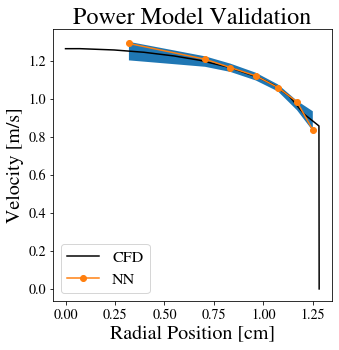

Actual Error in the Power_With_Phase model
Component: 0 MAE: 0.04 m/s NMAE: 3%
Component: 1 MAE: 0.01 m/s NMAE: 1%
Component: 2 MAE: 0.00 m/s NMAE: 0%
Component: 3 MAE: 0.00 m/s NMAE: 0%
Component: 4 MAE: 0.00 m/s NMAE: 0%
Component: 5 MAE: 0.02 m/s NMAE: 2%
Component: 6 MAE: 0.05 m/s NMAE: 5%
Average Error in profile MAE: 0.02 m/s NMAE: 2%
Max Error Component: 6  MAE: 0.05 m/s NMAE: 5%




In [5]:
model_validation_with_phase('Power_With_Phase', cfd_vel_profile, cfd_rad_pos, model_rad_pos, measured_mag[:-2], measured_phase[:-2])

32/32 [==============================] - 0s 380us/step
Monte Carlo Uncertainty Quantification
component: 0 RMSE: 0.13 m/s NRMSE: 10%
component: 1 RMSE: 0.07 m/s NRMSE: 5%
component: 2 RMSE: 0.04 m/s NRMSE: 3%
component: 3 RMSE: 0.04 m/s NRMSE: 3%
component: 4 RMSE: 0.02 m/s NRMSE: 2%
component: 5 RMSE: 0.02 m/s NRMSE: 2%
component: 6 RMSE: 0.05 m/s NRMSE: 4%
Max Error Component: 0 RMSE: 0.13 m/s NRMSE: 10%


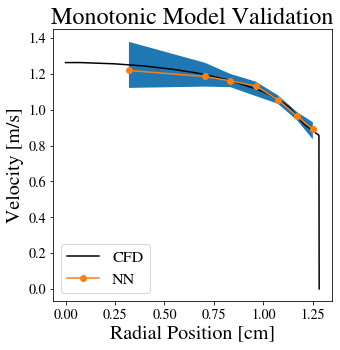

Actual Error in the Monotonic_With_Phase model
Component: 0 MAE: 0.03 m/s NMAE: 2%
Component: 1 MAE: 0.01 m/s NMAE: 1%
Component: 2 MAE: 0.00 m/s NMAE: 0%
Component: 3 MAE: 0.02 m/s NMAE: 1%
Component: 4 MAE: 0.00 m/s NMAE: 0%
Component: 5 MAE: 0.00 m/s NMAE: 0%
Component: 6 MAE: 0.01 m/s NMAE: 1%
Average Error in profile MAE: 0.01 m/s NMAE: 1%
Max Error Component: 0  MAE: 0.03 m/s NMAE: 2%




In [6]:
model_validation_with_phase('Monotonic_With_Phase', cfd_vel_profile, cfd_rad_pos, model_rad_pos, measured_mag[:-2], measured_phase[:-2])